In [96]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import six

from sklearn.tree import export_graphviz
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import RandomOverSampler
from category_encoders import OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split


In [ ]:
# import csv
# with open('/Data to analyze/customer_booking.csv', encoding='ISO-8859-1') as csvfile:
#     reader = csv.reader(csvfile)
#     with open('/Data to analyze/encoded_file.csv', mode='w', encoding='utf-8') as outfile:
#                 writer = csv.writer(outfile, delimiter=',')
#                 for row in reader:
#                     writer.writerow(row)



In [ ]:
# df = pd.read_csv("/Data to analyze/encoded_file.csv")

In [107]:
# df['purchase_lead'] = df['purchase_lead'].apply(lambda x: math.ceil(x/50)*50)
# mask_purchase_lead = df["purchase_lead"] < 420
# df = df[mask_purchase_lead]
# df.reset_index(drop=True, inplace=True)
df = pd.read_csv("/Data to analyze/encoded_file.csv")

In [109]:
target = "booking_complete"
X = df.drop(columns = target)
y = df[target]

In [110]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state=42
)


In [55]:
# over_sampler = RandomOverSampler(random_state = 42)
# X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)

In [111]:
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    RandomForestClassifier(n_estimators= 100 ,random_state = 42)
)
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['sales_channel', 'trip_type', 'flight_day',
                                     'route', 'booking_origin'],
                               use_cat_names=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [112]:
y_pred = model.predict(X_test)

In [113]:
acc_score = cross_val_score(model, X_train, y_train, cv=5, n_jobs=-1)
print("Accuracy:", acc_score)

Accuracy: [0.84775  0.850625 0.85     0.844625 0.853   ]


In [114]:
features = model.named_steps["onehotencoder"].get_feature_names()
importances = model.named_steps['randomforestclassifier'].feature_importances_

d:\Setup\Python\Lib\site-packages\category_encoders\utils.py:360: FutureWarning: `get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.
  warnings.warn("`get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.",


In [115]:
feat_imp = pd.Series(importances, index=features)


Text(0.5, 1.0, 'Feature Importance')

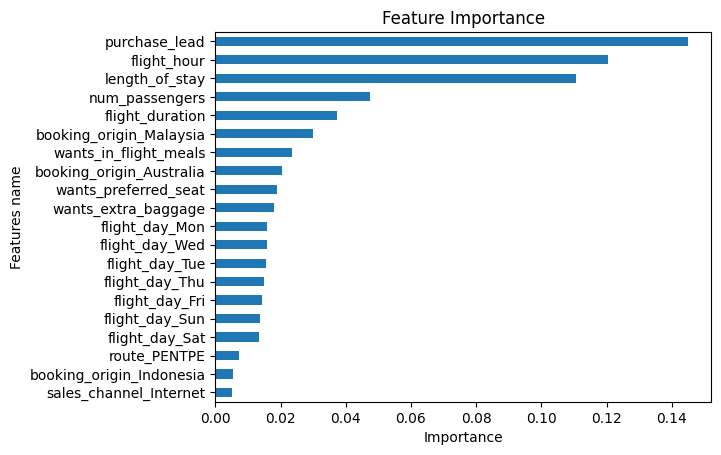

In [116]:
feat_imp.sort_values(key=abs).tail(20).plot(kind="barh")
plt.xlabel("Importance")
plt.ylabel("Features name")
plt.title("Feature Importance")

In [87]:
rf = model.named_steps["randomforestclassifier"]

In [89]:
tree = rf.estimators_[0]

In [101]:
dotfile = six.StringIO()
feat_imp.count()

906

In [104]:
feat_imp.head(40)

num_passengers            0.053727
sales_channel_Internet    0.005696
sales_channel_Mobile      0.005532
trip_type_RoundTrip       0.000882
trip_type_OneWay          0.000722
trip_type_CircleTrip      0.000228
purchase_lead             0.067056
length_of_stay            0.130312
flight_hour               0.144047
flight_day_Tue            0.016875
flight_day_Mon            0.017335
flight_day_Thu            0.016761
flight_day_Fri            0.015649
flight_day_Wed            0.016868
flight_day_Sat            0.014233
flight_day_Sun            0.014651
route_OOLPNH              0.000297
route_PERPVG              0.000465
route_CTUDPS              0.000592
route_CCUMEL              0.000556
route_HKTOOL              0.000868
route_MELSGN              0.001055
route_DMKKIX              0.002460
route_DACPER              0.000135
route_ICNOOL              0.000238
route_BWNPER              0.000417
route_DMKPER              0.001238
route_ICNSIN              0.002072
route_MELPEN        